##  SLR ASSINGMENT 

### Q4) Sal_ary_Hike -> Build a prediction model for Salary_hike


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns

In [2]:
x = pd.read_csv("Salary_Data.csv")
#print(x)
x.columns


Index(['Years_Experience', 'Salary'], dtype='object')

In [3]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Years_Experience    30 non-null float64
Salary              30 non-null int64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [4]:
x.describe()

,Years_Experience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
x.isnull().values.any()

False

In [6]:
x.isnull().sum().sum()

0

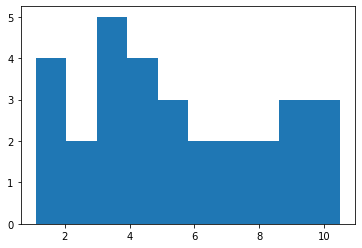

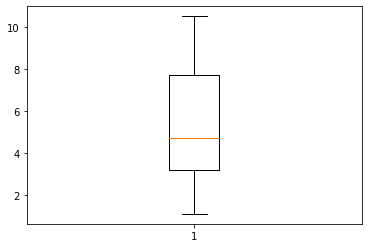

In [7]:
plt.hist(x.Years_Experience)
plt.show()

plt.boxplot(x.Years_Experience)
plt.show()


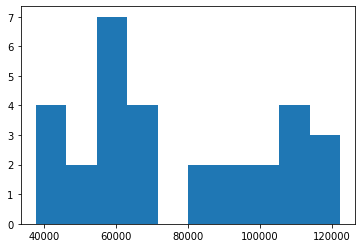

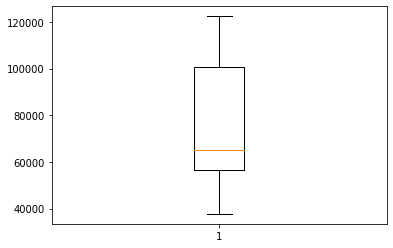

In [8]:
plt.hist(x.Salary)
plt.show()

plt.boxplot(x.Salary)
plt.show()

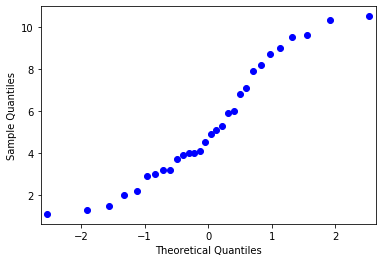

In [9]:
QQ_Years_Experience = sm.qqplot(x.Years_Experience, stats.t, distargs=(4,))
plt.show()

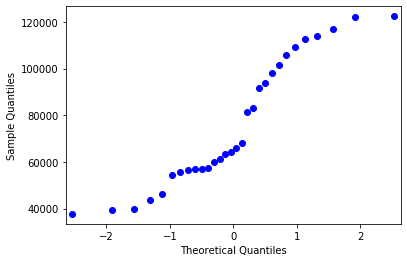

In [10]:
QQ_Salary = sm.qqplot(x.Salary, stats.t, distargs =(4,))
plt.show()

In [11]:
from scipy.stats import skew


In [12]:
print(skew(x.Years_Experience))
print(skew(x.Salary))

0.3603123252525561
0.3361618825592921


In [14]:
from scipy.stats import kurtosis

print(kurtosis(x.Years_Experience))
print(kurtosis(x.Salary))

-1.0447521989892943
-1.2829125042427751


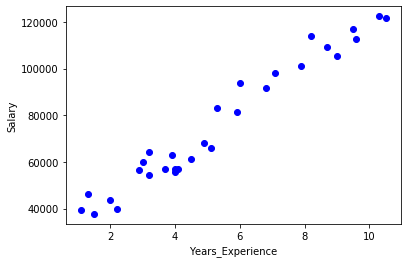

In [15]:
# SCATTER PLOT
plt.plot(x.Years_Experience, x.Salary, "bo")
plt.ylabel("Salary")
plt.xlabel("Years_Experience")

plt.show()

In [22]:
x.corr()
#x.Salary.corr(x.Years_Experience)

,Years_Experience,Salary
Years_Experience,1.000000,0.978242
Salary,0.978242,1.000000


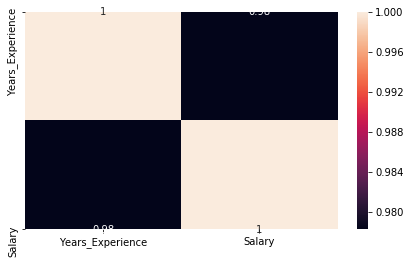

In [17]:
plt.subplots(figsize=(7, 4))
correlationMatrix = x.corr().abs()
sns.heatmap(correlationMatrix,annot=True)
plt.show()


In [66]:
# MODEL BUILDING
#y~x
import statsmodels.formula.api as smf
Model = smf.ols(" Salary ~ Years_Experience ",data = x).fit()
print(model.params)

Intercept           25792.200199
Years_Experience     9449.962321
dtype: float64


In [67]:
print(Model.conf_int(0.95))

                             0             1
Intercept         25648.381149  25936.019248
Years_Experience   9425.998027   9473.926616


In [68]:
print(Model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 12 May 2020   Prob (F-statistic):           1.14e-20
Time:                        00:52:09   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.579e+04   2273.053  

In [69]:
pred = Model.predict(x.iloc[:,0])
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [87]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#rmse = sqrt(mean_squared_error(y_actual, y_predicted))
rmse = sqrt(mean_squared_error(x.Salary, pred))
print(rmse)

5592.043608760662


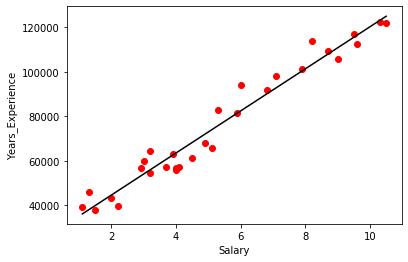

In [36]:
#visualization of regresion line over scatter plot
import matplotlib.pylab as plt
plt.scatter(x= x['Years_Experience'],y= x['Salary'],color='red')
plt.plot(x['Years_Experience'],pred,color='black')
plt.xlabel('Salary')
plt.ylabel('Years_Experience')
plt.show()

# here from this graph we have less chances of hetroscedascity in our model

In [1]:
#df = pd.DataFrame(model.resid_pearson)
#df.plot.density()
#plt.show()
# to se whether the residuals are normally distributed or not

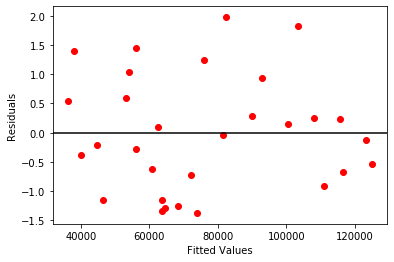

In [71]:
#fitted value vs residuals plot("imp plot")
plt.scatter(x=pred, y=model.resid_pearson,color='red')
plt.axhline(y=0,color='black')
plt.xlabel('Fitted Values') # Y Hat
plt.ylabel('Residuals') # Y-y Hat
plt.show()
# here according to this plot it should be equally distributed around the mean line 
# which is no sign of hetroscadascity
#so we will do some transformations

In [65]:
#Model Transformation of y~log(x)

import statsmodels.formula.api as smf
Model_log = smf.ols('Salary~np.log(Years_Experience)',data=x).fit()
print(Model_log.params)
print(Model_log.summary())
print(Model_log.conf_int(0.01))


Intercept                   14927.97177
np.log(Years_Experience)    40581.98796
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 12 May 2020   Prob (F-statistic):           3.25e-13
Time:                        00:51:26   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [51]:
pred_log = Model_log.predict(x.iloc[:,0]) 
pred_log

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [88]:
#rmse = sqrt(mean_squared_error(y_actual, y_predicted))
rmse = sqrt(mean_squared_error(x.Salary, pred_log))
print(rmse)

10302.893706228304


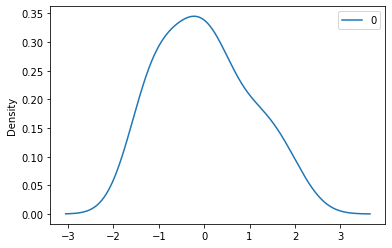

In [72]:
df = pd.DataFrame(model.resid_pearson)
df.plot.density()
plt.show()

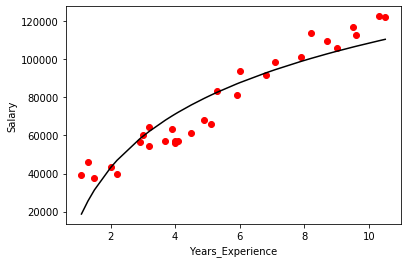

In [74]:
# Visualization of regresion line over the scatter plot of Waist and AT
# For visualization we need to import matplotlib.pyplot
import matplotlib.pylab as plt
plt.scatter(x=x['Years_Experience'],y=x['Salary'],color='red')
plt.plot(x['Years_Experience'],pred_log,color='black')
plt.xlabel('Years_Experience')
plt.ylabel('Salary')
plt.show()

#breif code
#plt.scatter(x.Years_Experience,x.Salary,c="g");plt.plot(x.Years_Experience,pred_log,"b")

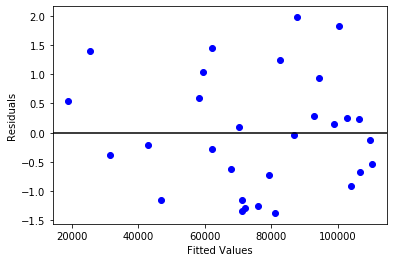

In [75]:
plt.scatter(x=pred_log, y=model.resid_pearson,color='b')
plt.axhline(y=0,color='black')
plt.xlabel('Fitted Values') # Y Hat
plt.ylabel('Residuals') # Y-y Hat
plt.show()


In [82]:
# MOdel transformation of log(Y)~X

Model_ylog = smf.ols('np.log(Salary)~Years_Experience', data=x).fit()
print(Model_ylog.params)
print(Model_ylog.summary())

Intercept           10.507402
Years_Experience     0.125453
dtype: float64
                            OLS Regression Results                            
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 12 May 2020   Prob (F-statistic):           7.03e-18
Time:                        01:04:53   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [83]:
pred_log1 = Model_ylog.predict(pd.DataFrame(x['Years_Experience']))
pred_log1
pred_ylog = np.exp(pred_log1)
pred_ylog

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [93]:
#rmse = sqrt(mean_squared_error(y_actual, y_predicted))
rmse = sqrt(mean_squared_error(x.Salary, pred_ylog))
print(rmse)

7213.2350766202335


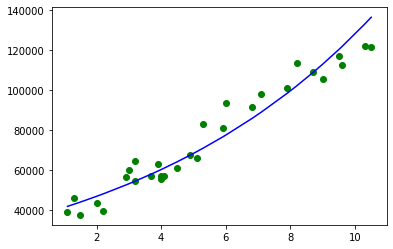

In [84]:
plt.scatter(x.Years_Experience,x.Salary,c="g");plt.plot(x.Years_Experience,pred_ylog,"b")
plt.show()

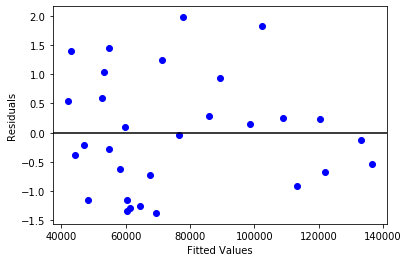

In [85]:
plt.scatter(x=pred_ylog, y=model.resid_pearson,color='b')
plt.axhline(y=0,color='black')
plt.xlabel('Fitted Values') # Y Hat
plt.ylabel('Residuals') # Y-y Hat
plt.show()


In [ ]:
#MODEL NAME   R-Square    Adjust R-Square   AIC(least)
#Model        0.957        0.955             606.9
#Model_log    0.854        0.849             643.5
#Model_ylog   0.932        0.93              -52.37

# Hence Model_ylog is the best among all